In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math

In [6]:
def a(x, w):
    #return step(np.dot(x, w))
    return logis(np.dot(x, w))

def logis(x):
    return 1/(1+math.e**(-100*x))

def cir(x):
    r = x[-1]**2 + x[-2]**2
    if r > 1:
        return 0
    return 1

def step(x):
    if x > 0:
        return 1
    return 0

def ts_err(ts, w):
    error = 0
    for x,y in ts:
        # error += abs(y - a(x, w))
        # error += (y - f(x, w))**2 
        error += (y - f5(x, w))**2 
    return error

In [7]:
def padbin(x, n):
    b = str(bin(x))[2:]
    z = ['0' for i in range(n-len(b))]
    return ''.join(z) + b

In [8]:
def make_ts(numbits, f):
    ts = []
    f = [int(i) for i in padbin(f, 2**numbits)]
    for x in range(2**numbits):
        val = [-1]+[int(i) for i in padbin(x, numbits)]
        val = np.array(val)
        ts += [(val, f[x])]
    return ts

def maj_func(val):
    ones = sum(val)
    if ones > len(val)/2:
        return 1
    return 0

def make_ts_func(numbits, f):
    ts = []
    for x in range(2**numbits):
        val = [-1]+[int(i) for i in padbin(x, numbits)]
        val = np.array(val)
        ts += [(val, f(val[1:]))]
    return ts

In [9]:
def perceptron_learn(ts, target_error):
    w = np.append(np.array([0.5]), np.zeros(len(ts[0][0])-1))    
    l = 1
    error = ts_err(ts, w)
    for epoch in range(200):
        for (x,y) in ts:
            y_err = y - a(x, w)
            w = w + y_err*l*x
        error = ts_err(ts, w)
        if error<=target_error:
            break
    return w, error<=target_error, error

In [10]:
# print(perceptron_learn(make_ts(2, 2), 0))

In [11]:
def learn_all_func(b):
    count = 0
    for f in range(2**2**b):
        ts = make_ts(b, f)
        w, success, err = perceptron_learn(ts, 0)
        if success:
            count += 1
    return count

def main():
    for b in range(2, 5):
        print("%5i/%5i"%(learn_all_func(b), 2**2**b))
        
# main()

In [12]:
def plot_maj():
    ts = make_ts_func(10, maj_func)
    x = []
    y = []
    for r in range(2, len(ts)-50):
        random.shuffle(ts)
        test = ts[0:50]
        train = ts[50:50+r] 
        w, success, err = perceptron_learn(train, 0)
        y+=[accuracy(test, w)]
        x+=[r]
    plt.plot(x, y)
    plt.xlabel('training size')
    plt.ylabel('accuracy')
    plt.show()
# plot_maj()

In [13]:
def f(xs, weights):
    x_input = np.array(xs)
    x = [-1]
    w = []
    for i in range(0, len(weights), 3):
        w = np.array(weights[i:i+3])
        if len(x)<3:
            x += [a(x_input, w)]
    return a(x, w)

In [14]:
def test_f(w):
    ts = make_ts(2, 0)
    ts = [xy[0] for xy in ts]
    for xs in ts:
        print(str(xs) + ": " + str(f(xs, w)))

# test_f([-2.5, -2, -1, 0.5, 1, 1, 2.5, 2, 1])

In [15]:
MAX_ITERS = 5000
def hill_climb(ts, target_err, l=1):
    w = np.zeros(9)
    iters = 0
    while(ts_err(ts, w) > target_err):
        iters += 1
        if iters>MAX_ITERS:
            break
        w1 = w + (np.random.random(9)*2-1)*l
        if ts_err(ts, w1) < ts_err(ts, w):
            #print(w1)
            w = w1  
    if iters > MAX_ITERS:
        return hill_climb(ts, target_err, l=1)
    return w #, iters

# w = hill_climb(make_ts(2, 6), 0)
# print(w)
# test_f(w)

In [16]:
# iters vs l
def lamdas():
    x = []
    y = []
    for l in range(1, 30):
        iters = 0
        for s in range(50):
            w, i = hill_climb(make_ts(2, 6), 0.1, l=l/10)
            # print(str(l/10) + ": "+ str(i))
            iters += i
        x += [l/10]
        y += [i/50]
        
    plt.plot(x, y)
    plt.xlabel('lambda')
    plt.ylabel('iterations')
    plt.show()   

# lamdas()

In [54]:
def accuracy(ts, w):
    correct = 0
    for x,y in ts:
        # if (y - a(x, w)) == 0:
        print(str(x) + " " + str(f5([abs(x1) for x1 in x], w)))
        if (y - f5(x, w)) <0.0001:
            correct += 1
    return correct/len(ts)

In [50]:
def make_ts_square(x1, y1, s, num):
    ts = []
    dx = s/num
    dy = s/num
    for x in range(num):
        for y in range(num):
            val = [-1, x1+dx*x, y1+dy*y]
            val = np.array(val)
            ts += [(val, cir(val))]
    return ts

make_ts_square(-1.5, -1.5, 3, 100)

[(array([-1. , -1.5, -1.5]), 0),
 (array([-1.  , -1.5 , -1.47]), 0),
 (array([-1.  , -1.5 , -1.44]), 0),
 (array([-1.  , -1.5 , -1.41]), 0),
 (array([-1.  , -1.5 , -1.38]), 0),
 (array([-1.  , -1.5 , -1.35]), 0),
 (array([-1.  , -1.5 , -1.32]), 0),
 (array([-1.  , -1.5 , -1.29]), 0),
 (array([-1.  , -1.5 , -1.26]), 0),
 (array([-1.  , -1.5 , -1.23]), 0),
 (array([-1. , -1.5, -1.2]), 0),
 (array([-1.  , -1.5 , -1.17]), 0),
 (array([-1.  , -1.5 , -1.14]), 0),
 (array([-1.  , -1.5 , -1.11]), 0),
 (array([-1.  , -1.5 , -1.08]), 0),
 (array([-1.  , -1.5 , -1.05]), 0),
 (array([-1.  , -1.5 , -1.02]), 0),
 (array([-1.  , -1.5 , -0.99]), 0),
 (array([-1.  , -1.5 , -0.96]), 0),
 (array([-1.  , -1.5 , -0.93]), 0),
 (array([-1. , -1.5, -0.9]), 0),
 (array([-1.  , -1.5 , -0.87]), 0),
 (array([-1.  , -1.5 , -0.84]), 0),
 (array([-1.  , -1.5 , -0.81]), 0),
 (array([-1.  , -1.5 , -0.78]), 0),
 (array([-1.  , -1.5 , -0.75]), 0),
 (array([-1.  , -1.5 , -0.72]), 0),
 (array([-1.  , -1.5 , -0.69]), 0),
 

In [55]:
def f5(xs, weights):
    x_input = np.array(xs)
    x = [-1]
    x2 = [-1]
    w = []
    for i in range(0, len(weights), 3):
        w = np.array(weights[i:i+3])
        if len(x)<3:
            x += [a(x_input, w)]
        elif len(x2) < 3:
            x2 += [a(x, w)]
    return a(x2, w)

def cir_learn(ts, target_err, l=1):
    w = np.zeros(15)
    i = 0
    while(ts_err(ts, w) > target_err):
        i += 1
        w1 = w + np.random.uniform(-1, 1, 15)*l
        if ts_err(ts, w1) < ts_err(ts, w):
            w = w1
            print(w)
    return w 

def cir_test():
    train = make_ts_square(0, 0, 2, 5)
    test = make_ts_square(-1.5, -1.5, 3, 150)
    random.shuffle(test)
    test = test[:10000]
    w = cir_learn(train, 0, l=0.01)
    print(w)
    return accuracy(test, w)

cir_test()

[ 8.90377885e-03  1.98215922e-04  8.20409572e-03  9.49499619e-03
  5.01281217e-04 -3.59653495e-03 -4.55914581e-04  8.63571026e-04
 -8.75168539e-03 -5.36283930e-03  3.21714368e-05 -9.38552680e-03
  1.95943905e-03 -9.29567806e-03 -2.67823636e-03]
[ 0.00299551  0.00078962  0.00895468  0.00162233  0.00080344 -0.00771187
 -0.00778769 -0.00168426 -0.01727293 -0.00643469  0.00722843 -0.00146843
 -0.00055806 -0.01325344 -0.0010259 ]
[-0.00494205  0.00785909  0.01806088  0.00791469 -0.00133739 -0.0052082
 -0.00944618  0.00019507 -0.02550801 -0.00414499  0.01690828  0.00482598
  0.00178806 -0.02264735  0.00638061]
[-9.52366204e-03  1.66377740e-02  1.94577533e-02 -1.32049138e-03
 -6.85484793e-05 -1.04939225e-02 -3.88484405e-03  7.10340706e-03
 -3.43607522e-02 -9.29762873e-03  1.51842575e-02  2.83262752e-03
 -2.09151400e-03 -1.93253687e-02  1.10768042e-03]
[-1.91280356e-02  1.06597773e-02  2.17647233e-02  4.61083534e-05
 -5.81441085e-03 -7.42843827e-03 -1.10528959e-02  1.00072607e-02
 -3.74405638e

[ 0.06530494  0.06970737 -0.02520199 -0.08213986 -0.02670737 -0.06896719
 -0.07116833  0.04883667 -0.09696739 -0.07214766  0.06406593  0.03728757
 -0.06085851 -0.10866182  0.00141796]
[ 0.05983011  0.06480645 -0.01952942 -0.08805566 -0.03542859 -0.07162284
 -0.06652932  0.04438008 -0.09131782 -0.07932678  0.06026004  0.0397488
 -0.06286746 -0.11516608 -0.00785629]
[ 0.05433603  0.07152295 -0.01456347 -0.08124261 -0.02715804 -0.06740054
 -0.06537399  0.04368918 -0.09987957 -0.08840564  0.05298711  0.04312774
 -0.06804279 -0.12289481 -0.00922586]
[ 0.0594178   0.07271755 -0.00942589 -0.08284528 -0.03253631 -0.0676611
 -0.07247557  0.03996017 -0.10168433 -0.09148023  0.0523763   0.03516547
 -0.07051802 -0.13052441 -0.00563432]
[ 0.06840737  0.07582321 -0.01369492 -0.08766393 -0.02875454 -0.07590163
 -0.06807776  0.04975231 -0.10967483 -0.08281685  0.04522906  0.04022622
 -0.07502944 -0.13978068 -0.01506826]
[ 0.06811934  0.0828807  -0.01873696 -0.09029095 -0.02769633 -0.07848246
 -0.07634

[ 0.06033414  0.06655375 -0.00299992 -0.06871635 -0.02193402 -0.06770911
 -0.05927371  0.16140094 -0.17169224 -0.04564945 -0.00618645 -0.01590611
 -0.09965254 -0.29900689  0.04376276]
[ 0.06397     0.07220757 -0.00720872 -0.06788089 -0.0156007  -0.0738765
 -0.06296069  0.15452715 -0.17640311 -0.0535612  -0.01208181 -0.02349898
 -0.09085227 -0.30434475  0.05358012]
[ 0.06654736  0.07484771 -0.01221434 -0.0731239  -0.0248622  -0.07927355
 -0.05513458  0.16213405 -0.17661695 -0.05345535 -0.01783839 -0.02683808
 -0.09853369 -0.31160867  0.05893252]
[ 0.06250893  0.07673874 -0.00459734 -0.07704173 -0.01847871 -0.0872852
 -0.04878781  0.15956921 -0.1759296  -0.05017408 -0.00853638 -0.01803845
 -0.10157543 -0.31917341  0.05010099]
[ 0.05811505  0.07032651 -0.00684161 -0.0825461  -0.02194791 -0.08718509
 -0.05621475  0.15931944 -0.17915896 -0.04699304 -0.01627507 -0.01908915
 -0.10992802 -0.32725423  0.04154394]
[ 0.05991564  0.07361498 -0.0121426  -0.08102094 -0.02204329 -0.09013258
 -0.05600

[ 0.10203544  0.11093168  0.01450726 -0.14754426 -0.06072006 -0.14340664
 -0.09217292  0.16881889 -0.18932931 -0.0668092  -0.04321064 -0.01670505
 -0.20830413 -0.51445908  0.05047559]
[ 0.09855101  0.10576237  0.01711141 -0.15577825 -0.05392491 -0.14726313
 -0.08587464  0.16035847 -0.18228901 -0.06433922 -0.03747418 -0.02058151
 -0.21053054 -0.51688649  0.05093627]
[ 0.10572016  0.1083606   0.02251605 -0.15818293 -0.04922605 -0.14518611
 -0.08628135  0.16278679 -0.18506264 -0.06060551 -0.027697   -0.01343701
 -0.21135958 -0.52649615  0.04421932]
[ 0.11407151  0.11529005  0.01892608 -0.15464543 -0.05715191 -0.14590573
 -0.092483    0.15408644 -0.17840653 -0.06385189 -0.02057209 -0.02321914
 -0.20462097 -0.5357844   0.05276291]
[ 0.10613754  0.11233357  0.01968129 -0.16190326 -0.04724116 -0.14873157
 -0.08489352  0.15947508 -0.17429101 -0.05420434 -0.02335726 -0.02433718
 -0.20477022 -0.54395485  0.05801545]
[ 0.10892568  0.11451471  0.02146894 -0.15696858 -0.0479832  -0.15061832
 -0.075

[ 0.10763208  0.12261286 -0.03154927 -0.20988202 -0.09356708 -0.20346963
 -0.06615376  0.1739833  -0.18378028 -0.19171845 -0.05842816 -0.03199911
 -0.27755897 -0.76871975  0.10428579]
[ 0.11484954  0.12627221 -0.03875974 -0.21070929 -0.09937498 -0.19781232
 -0.07011391  0.17409281 -0.1854404  -0.19312143 -0.05240083 -0.04175349
 -0.27321821 -0.76871913  0.10637827]
[ 0.11658645  0.13350206 -0.04273331 -0.21049438 -0.10912365 -0.20198396
 -0.07211684  0.1769962  -0.18504624 -0.18856316 -0.04658147 -0.04093066
 -0.2725435  -0.77799764  0.10680486]
[ 0.110743    0.13274035 -0.03900836 -0.21770547 -0.10985383 -0.20576874
 -0.06920256  0.18652874 -0.18438604 -0.18682168 -0.04451999 -0.04619273
 -0.26898677 -0.78201145  0.10953486]
[ 0.11398275  0.13312519 -0.04119902 -0.22384402 -0.11393302 -0.2032028
 -0.07505411  0.19612741 -0.18618009 -0.17727071 -0.04508495 -0.03666541
 -0.27412942 -0.7855993   0.10349801]
[ 0.12193097  0.12676231 -0.03588025 -0.2289578  -0.11529107 -0.20424544
 -0.0807

[ 0.12959701  0.13739911 -0.04519416 -0.29046189 -0.14508217 -0.27661016
 -0.10308019  0.18083685 -0.22485713 -0.18134617 -0.05251538 -0.13757547
 -0.26405214 -1.02455944  0.10689055]
[ 0.13712914  0.13345193 -0.04308958 -0.28760695 -0.14730023 -0.27006159
 -0.10448472  0.17512506 -0.2325819  -0.18846266 -0.04910861 -0.13594608
 -0.25512321 -1.03086259  0.11374146]
[ 0.13321634  0.13167499 -0.03362642 -0.29144921 -0.14765378 -0.26941819
 -0.11284058  0.18127545 -0.23680681 -0.19146858 -0.03985084 -0.13794746
 -0.24851415 -1.03216336  0.12002903]
[ 0.13053741  0.14037259 -0.02934325 -0.29319784 -0.14044393 -0.27286981
 -0.10559412  0.18157361 -0.24459636 -0.18208021 -0.03572112 -0.14410093
 -0.25542046 -1.03590589  0.11618756]
[ 0.13426113  0.14459685 -0.03431707 -0.28628372 -0.13289376 -0.26328499
 -0.10671075  0.18223824 -0.23561682 -0.18815946 -0.04361295 -0.14399731
 -0.24892093 -1.04068899  0.1213061 ]
[ 0.13848109  0.13533344 -0.02524514 -0.28173984 -0.13593695 -0.25571101
 -0.104

[ 0.13228537  0.13042595 -0.00911298 -0.27886095 -0.11970901 -0.25993823
 -0.14344288  0.1661457  -0.25595366 -0.13514983 -0.05667528 -0.07970053
 -0.28074022 -1.23766925  0.08802194]
[ 0.14141065  0.13528686 -0.01701924 -0.2775513  -0.11432355 -0.26791465
 -0.15118253  0.1584595  -0.246708   -0.13215326 -0.04844622 -0.0805814
 -0.27885824 -1.24464915  0.09341771]
[ 0.14475479  0.13904514 -0.01701879 -0.28538169 -0.12237761 -0.27746392
 -0.15164842  0.15104606 -0.25463775 -0.12577098 -0.05629822 -0.07582149
 -0.28651866 -1.25048945  0.09005371]
[ 0.1449438   0.14004251 -0.02249237 -0.29526121 -0.12299517 -0.28074457
 -0.15138307  0.15175944 -0.24570411 -0.12508481 -0.0629848  -0.06756015
 -0.28108506 -1.24962644  0.08784383]
[ 0.14401538  0.14375288 -0.03233288 -0.29740591 -0.12586237 -0.27459729
 -0.15072805  0.16064417 -0.24145812 -0.1261085  -0.05472572 -0.05774507
 -0.27719617 -1.25474806  0.09577328]
[ 0.14054777  0.14381581 -0.02347497 -0.30137965 -0.13188958 -0.2836589
 -0.15121

[ 0.13015857  0.14204331 -0.07102882 -0.32937869 -0.15955436 -0.29040823
 -0.18042251  0.21269467 -0.31296351 -0.11564232 -0.11424246 -0.03261109
 -0.29722595 -1.4697644   0.07040059]
[ 0.13903345  0.13593255 -0.06240234 -0.32688828 -0.16865201 -0.29344123
 -0.18628036  0.22115679 -0.30775343 -0.11935253 -0.11520426 -0.02920803
 -0.30362418 -1.47967563  0.06579939]
[ 0.14596954  0.1361871  -0.07039432 -0.3234423  -0.17389616 -0.28703768
 -0.19287869  0.22612751 -0.31099563 -0.12138818 -0.1177715  -0.03275327
 -0.29726903 -1.48151804  0.07344882]
[ 0.13793026  0.14199852 -0.068729   -0.31500949 -0.17503805 -0.28600061
 -0.19534746  0.21780315 -0.30772726 -0.12865266 -0.10826945 -0.0285663
 -0.29204147 -1.48597454  0.07975536]
[ 0.13892833  0.13206881 -0.07054997 -0.32058463 -0.17823436 -0.27636525
 -0.19089967  0.21751513 -0.30232945 -0.1375474  -0.11330313 -0.0237228
 -0.28681495 -1.49318044  0.08763618]
[ 0.13336622  0.13894772 -0.07949101 -0.31402194 -0.18809432 -0.27986547
 -0.18844

[ 0.13030061  0.13394764 -0.1206744  -0.31060271 -0.18211116 -0.27678503
 -0.16515195  0.25237584 -0.28516577 -0.11600927 -0.13816611 -0.06229336
 -0.27254602 -1.7161752   0.10999616]
[ 0.12521822  0.13536503 -0.11208443 -0.31110861 -0.17376508 -0.27522393
 -0.1720617   0.2463529  -0.28574355 -0.12117337 -0.12824498 -0.06884524
 -0.26490267 -1.72095796  0.11529029]
[ 0.12684016  0.13083006 -0.1165964  -0.31455888 -0.17535586 -0.27141772
 -0.17310662  0.2444846  -0.29011277 -0.11949905 -0.13096834 -0.06270797
 -0.26181914 -1.7190881   0.11577685]
[ 0.12385547  0.13611688 -0.11457633 -0.30877558 -0.16548432 -0.26344145
 -0.17446218  0.24594306 -0.29121359 -0.12815773 -0.12203277 -0.06481258
 -0.26936756 -1.72906914  0.11515185]
[ 0.1193244   0.13418839 -0.11408593 -0.30223963 -0.17483604 -0.25969911
 -0.17336419  0.24065874 -0.2876078  -0.1317693  -0.13170502 -0.0598659
 -0.27345581 -1.73020134  0.10520246]
[ 0.12568287  0.1242261  -0.12039206 -0.30017919 -0.17429785 -0.26498127
 -0.1801

[ 0.14845099  0.17349527 -0.10157938 -0.35573351 -0.15315806 -0.32580885
 -0.11973945  0.26696219 -0.2798232  -0.1672647  -0.19811309 -0.03566964
 -0.26629284 -1.9372675   0.10721064]
[ 0.13947534  0.16642198 -0.1106882  -0.35458501 -0.14666838 -0.33299129
 -0.11380413  0.25866637 -0.27811839 -0.17418252 -0.20284289 -0.02581173
 -0.2744106  -1.94151393  0.09963585]
[ 0.14297614  0.16923822 -0.11443809 -0.35732109 -0.14054074 -0.3283367
 -0.11961619  0.25116588 -0.2749624  -0.18278196 -0.19582377 -0.03452481
 -0.27516553 -1.94328634  0.09737654]
[ 0.13617417  0.1624072  -0.10779509 -0.3526505  -0.13408978 -0.33371323
 -0.12255185  0.24913395 -0.26531831 -0.18888992 -0.19699682 -0.02500879
 -0.27892456 -1.94805193  0.0972067 ]
[ 0.1376066   0.1597352  -0.09827841 -0.35154571 -0.12917409 -0.3292926
 -0.12889423  0.25105572 -0.26737555 -0.18373269 -0.20481687 -0.01615623
 -0.28218811 -1.95745166  0.09961317]
[ 0.13428787  0.15963393 -0.10698183 -0.35104788 -0.13063075 -0.3306167
 -0.123482

[ 0.21009285  0.22626237 -0.08839239 -0.35605242 -0.11813836 -0.3522117
 -0.12503339  0.2089535  -0.21343903 -0.17089239 -0.21754402 -0.00609009
 -0.26283688 -2.15926921  0.10615903]
[ 0.20595714  0.22068352 -0.09301887 -0.35580743 -0.11589744 -0.34274021
 -0.12134682  0.20684199 -0.22181155 -0.17844879 -0.21320806  0.00274579
 -0.25638873 -2.16668485  0.11448894]
[ 0.20612872  0.22660595 -0.09547751 -0.35339104 -0.11365019 -0.33958397
 -0.11789405  0.216228   -0.22944493 -0.17171703 -0.21163878  0.00462235
 -0.26466698 -2.17435372  0.10726183]
[ 0.20878889  0.22007132 -0.10237369 -0.35622741 -0.11929546 -0.34484474
 -0.11626789  0.22163058 -0.22002867 -0.17041127 -0.21652599 -0.00375724
 -0.27061731 -2.18226807  0.09894592]
[ 0.20312446  0.21604281 -0.0945841  -0.34758237 -0.11138568 -0.34984648
 -0.12320758  0.22241562 -0.21791715 -0.17600979 -0.21013605  0.00412012
 -0.27144988 -2.18698614  0.09796802]
[ 0.21194102  0.22135802 -0.09512392 -0.34782581 -0.11216041 -0.3436683
 -0.11534

[ 0.24381405  0.25279682 -0.02211887 -0.32151894 -0.12544515 -0.33040524
 -0.11243597  0.24722569 -0.28756613 -0.23170398 -0.21668294 -0.03853095
 -0.28892638 -2.41468467  0.08384371]
[ 0.24627137  0.25152418 -0.02209129 -0.32847057 -0.12144853 -0.32359339
 -0.107283    0.25388787 -0.29261498 -0.22182226 -0.22451191 -0.02993703
 -0.2815277  -2.41733677  0.09094379]
[ 0.23859582  0.24894087 -0.01519162 -0.32436769 -0.13132775 -0.33277873
 -0.10529909  0.25222696 -0.28730399 -0.23089797 -0.23037679 -0.03336143
 -0.27340607 -2.41952509  0.09795924]
[ 0.24630033  0.24982324 -0.00850114 -0.32360954 -0.12649178 -0.3328372
 -0.09798353  0.24955666 -0.29494201 -0.23639746 -0.22383116 -0.03415547
 -0.27720145 -2.42951907  0.09437814]
[ 0.23874394  0.24596892 -0.00742514 -0.32539074 -0.1226929  -0.33773045
 -0.09375101  0.25851973 -0.29141901 -0.2399746  -0.2177184  -0.03259032
 -0.28427931 -2.43275673  0.08577898]
[ 0.23992562  0.25466835 -0.00790504 -0.3253133  -0.12125477 -0.3443623
 -0.08547

[ 0.24681231  0.28883751 -0.03936868 -0.31145327 -0.14068145 -0.30180122
 -0.07537725  0.20493757 -0.23773524 -0.22186566 -0.21856484 -0.05808648
 -0.30599721 -2.69118648  0.06779826]
[ 0.25628655  0.29158747 -0.03670118 -0.30282453 -0.14448795 -0.29947461
 -0.07391603  0.20925904 -0.22896273 -0.22954406 -0.21226007 -0.06052482
 -0.30887799 -2.69978985  0.06168669]
[ 0.2547359   0.28987752 -0.04015934 -0.31234801 -0.13908146 -0.30212495
 -0.0687267   0.20019552 -0.22891632 -0.22136537 -0.20696125 -0.05899611
 -0.30479959 -2.70453205  0.06426011]
[ 0.25665882  0.28580237 -0.04778142 -0.30608877 -0.13614927 -0.30441102
 -0.07708527  0.19947654 -0.23265455 -0.22080719 -0.20451393 -0.0680414
 -0.30692737 -2.71270037  0.06263188]
[ 0.25433788  0.28653099 -0.0415905  -0.31365148 -0.14052403 -0.30254679
 -0.07353357  0.20563468 -0.23965691 -0.22643122 -0.21292488 -0.06108198
 -0.31567633 -2.71837671  0.05855667]
[ 0.25912186  0.278136   -0.03642909 -0.31894997 -0.14099133 -0.29871142
 -0.0712

[ 0.26063939  0.29071315 -0.07417079 -0.31611978 -0.17344992 -0.28598216
 -0.09950341  0.21333214 -0.23877331 -0.17732762 -0.21068263 -0.0429595
 -0.32441467 -2.95640635  0.04905434]
[ 0.25607506  0.29343907 -0.07657822 -0.30819895 -0.18185144 -0.28293162
 -0.0952652   0.20807732 -0.22965246 -0.17734964 -0.21183017 -0.050487
 -0.32299951 -2.96351667  0.0491755 ]
[ 0.26437302  0.30161549 -0.0672889  -0.31534422 -0.17214846 -0.28710433
 -0.09852822  0.2141746  -0.22813631 -0.17565787 -0.2140774  -0.05082786
 -0.33059796 -2.9685831   0.04407698]
[ 0.26276723  0.30449494 -0.0584407  -0.31800519 -0.17032817 -0.28569532
 -0.1036043   0.21855318 -0.23394457 -0.18558712 -0.22247457 -0.05988231
 -0.33360832 -2.97385223  0.03561131]
[ 0.26084853  0.29882332 -0.05234003 -0.32205439 -0.16379382 -0.29062697
 -0.10258214  0.21807731 -0.24177536 -0.1935651  -0.22491232 -0.06356221
 -0.34203583 -2.97922675  0.02700463]
[ 0.253011    0.29906963 -0.04423826 -0.32893262 -0.17081184 -0.28963889
 -0.106195

[ 0.27456448  0.29732728 -0.03078188 -0.30791722 -0.12959636 -0.26489166
 -0.12872689  0.24660672 -0.22944305 -0.21014178 -0.27679908 -0.02781823
 -0.3528078  -3.184276    0.01854462]
[ 0.27832006  0.292269   -0.02924493 -0.31132601 -0.12942075 -0.27111439
 -0.12147756  0.24917617 -0.23213808 -0.2147644  -0.27762731 -0.0197589
 -0.35017198 -3.19029403  0.02567507]
[ 0.2700112   0.28975675 -0.03731912 -0.308431   -0.13628995 -0.2719842
 -0.11540424  0.24378786 -0.22900166 -0.21105067 -0.28276065 -0.01402941
 -0.34087657 -3.18681619  0.02844061]
[ 0.27073233  0.28842865 -0.04255616 -0.31488188 -0.13679865 -0.28184471
 -0.11449599  0.2435083  -0.22108451 -0.21281302 -0.28383856 -0.012383
 -0.34441316 -3.18892645  0.02339934]
[ 0.27924407  0.29242839 -0.0332881  -0.31966234 -0.13413044 -0.28411934
 -0.10770794  0.23955174 -0.22350002 -0.20733306 -0.29374734 -0.00704914
 -0.34079719 -3.19474103  0.03115048]
[ 0.28674383  0.28258325 -0.03455165 -0.31361984 -0.12557073 -0.28447152
 -0.1047090

[ 0.30553567  0.26679668 -0.01972124 -0.31343875 -0.13474783 -0.26799714
 -0.12791862  0.22126353 -0.20691781 -0.20891801 -0.26348024 -0.04656792
 -0.31292681 -3.41123066  0.05957346]
[ 0.30893942  0.27167879 -0.02887472 -0.3150441  -0.14068539 -0.27661998
 -0.12724226  0.22061548 -0.19697532 -0.20545997 -0.25863938 -0.04236133
 -0.31165804 -3.41889471  0.06114204]
[ 0.30756892  0.27753092 -0.03097591 -0.31245342 -0.14681533 -0.27972171
 -0.11907505  0.22630474 -0.19769681 -0.21464965 -0.26802397 -0.04044199
 -0.32010599 -3.4250783   0.05593665]
[ 0.30996341  0.28574866 -0.02657012 -0.30749033 -0.14780371 -0.2699106
 -0.11134374  0.23350179 -0.19250312 -0.2054112  -0.27187145 -0.04405931
 -0.3228378  -3.43238581  0.04871548]
[ 0.30283177  0.28276528 -0.02672013 -0.30677453 -0.14511378 -0.2707908
 -0.10782068  0.22696933 -0.19771549 -0.20119608 -0.26811112 -0.03758764
 -0.31774704 -3.44085018  0.05466978]
[ 0.30523806  0.29037489 -0.02795956 -0.30126643 -0.13560928 -0.2791468
 -0.104753

[ 0.28230799  0.33257045 -0.0664081  -0.29054327 -0.13380158 -0.2725633
 -0.07591221  0.23834129 -0.18959687 -0.19166963 -0.22999444 -0.0295927
 -0.36725455 -3.69981705  0.00842046]
[ 0.28953975  0.3340877  -0.06470642 -0.28181527 -0.12566711 -0.27216024
 -0.08057793  0.24472211 -0.18348068 -0.20094672 -0.22503863 -0.02843095
 -0.36037922 -3.70525438  0.01749396]
[ 0.29244528  0.33447734 -0.06046971 -0.2860834  -0.12764012 -0.2653063
 -0.08299306  0.24269564 -0.19117089 -0.1920142  -0.21807648 -0.038083
 -0.35865392 -3.71008934  0.01085074]
[ 0.2842713   0.3339195  -0.05791133 -0.2840341  -0.13516309 -0.27046131
 -0.07769361  0.23705057 -0.19589098 -0.19647986 -0.22419966 -0.03573621
 -0.35617981 -3.72007734  0.0190486 ]
[ 0.28548644  0.34123807 -0.05116268 -0.27904235 -0.13002571 -0.27172907
 -0.07773803  0.24092823 -0.20427664 -0.19710968 -0.21714604 -0.03620619
 -0.34711113 -3.72928799  0.02791727]
[ 0.29376136  0.3418634  -0.04993854 -0.28037994 -0.12046919 -0.27607673
 -0.07908269

[ 0.37252049  0.373763   -0.02921735 -0.24636462 -0.07758873 -0.24739203
 -0.12368745  0.24015999 -0.23336348 -0.15712983 -0.16375447 -0.06991806
 -0.3140293  -3.95772039  0.06046988]
[ 0.37192246  0.37305918 -0.03491442 -0.24698791 -0.0794153  -0.24447489
 -0.13365418  0.23338932 -0.23121934 -0.15220126 -0.15983961 -0.06200689
 -0.30556438 -3.95786668  0.06752824]
[ 0.36411758  0.3727627  -0.02983318 -0.24976421 -0.08452936 -0.24089552
 -0.13399431  0.23783265 -0.24054732 -0.15744568 -0.16301312 -0.05965494
 -0.29911458 -3.95796322  0.07181758]
[ 0.36184925  0.36834966 -0.02309254 -0.24381024 -0.08675328 -0.23096655
 -0.13747552  0.24757029 -0.23673801 -0.14874383 -0.16002213 -0.05610925
 -0.30215035 -3.95923517  0.06931657]
[ 0.36579997  0.37376057 -0.02173181 -0.24347309 -0.08173211 -0.23035979
 -0.14583111  0.25112763 -0.23647592 -0.14693473 -0.1514035  -0.05835555
 -0.30419968 -3.96798081  0.06618394]
[ 0.37082667  0.36720287 -0.01468024 -0.25286527 -0.08668343 -0.23835404
 -0.153

[-1.   -1.38  1.1 ] 9.755077427344167e-166
[-1.   -0.1   0.74] 9.755077427344167e-166
[-1.   -1.18 -0.86] 9.755077427344167e-166
[-1.    0.62  0.36] 9.755077427344167e-166
[-1.   -1.04  0.96] 9.755077427344167e-166
[-1.    1.    0.36] 9.755077427344167e-166
[-1.    0.9   1.42] 9.755077427344167e-166
[-1.   -0.92 -1.16] 9.755077427344167e-166
[-1.    1.1   0.36] 9.755077427344167e-166
[-1.    0.28 -0.86] 9.755077427344167e-166
[-1.  -1.5  1.4] 9.755077427344167e-166
[-1.    0.68  0.9 ] 9.755077427344167e-166
[-1.   0.9  0.6] 9.755077427344167e-166
[-1.    1.14 -0.24] 9.755077427344167e-166
[-1.    0.08  0.34] 9.755077427343613e-166
[-1.    1.28 -0.44] 9.755077427344167e-166
[-1.   -1.42 -0.72] 9.755077427344167e-166
[-1.    0.46  0.08] 9.755077427342504e-166
[-1.    0.42 -0.22] 9.755077427343613e-166
[-1.   -1.34 -0.2 ] 9.755077427344167e-166
[-1.   -1.28  0.5 ] 9.755077427344167e-166
[-1.  -1.3  0.4] 9.755077427344167e-166
[-1.   -0.98 -0.28] 9.755077427344167e-166
[-1.   -0.82  0.28] 

[-1.   -1.32 -0.96] 9.755077427344167e-166
[-1.    1.02 -1.1 ] 9.755077427344167e-166
[-1.    0.72  0.4 ] 9.755077427344167e-166
[-1.    0.44 -0.66] 9.755077427344167e-166
[-1.    0.7  -0.56] 9.755077427344167e-166
[-1.   -0.3   0.98] 9.755077427344167e-166
[-1.   -0.98 -0.66] 9.755077427344167e-166
[-1.    0.1   1.48] 9.755077427344167e-166
[-1.    1.2  -0.86] 9.755077427344167e-166
[-1.    0.46 -1.22] 9.755077427344167e-166
[-1.    0.92  1.42] 9.755077427344167e-166
[-1.   -0.14  0.68] 9.755077427344167e-166
[-1.    1.18  0.98] 9.755077427344167e-166
[-1.    0.76  0.7 ] 9.755077427344167e-166
[-1.   -0.64 -0.76] 9.755077427344167e-166
[-1.   -0.28  1.36] 9.755077427344167e-166
[-1.   -1.36 -1.26] 9.755077427344167e-166
[-1.    1.22  1.22] 9.755077427344167e-166
[-1.   -0.56  0.04] 9.755077427342504e-166
[-1.    1.06  0.64] 9.755077427344167e-166
[-1.    1.1   0.12] 9.755077427344167e-166
[-1.   -0.96 -1.2 ] 9.755077427344167e-166
[-1.    0.96 -0.54] 9.755077427344167e-166
[-1.    0.1

[-1.    1.28  0.98] 9.755077427344167e-166
[-1.   -0.52 -0.84] 9.755077427344167e-166
[-1.    0.62 -1.12] 9.755077427344167e-166
[-1.    1.28  1.36] 9.755077427344167e-166
[-1.   -0.66 -0.34] 9.755077427344167e-166
[-1.   -1.04 -0.8 ] 9.755077427344167e-166
[-1.   -0.76 -0.36] 9.755077427344167e-166
[-1.    1.18 -0.84] 9.755077427344167e-166
[-1.   -0.12  0.54] 9.755077427344167e-166
[-1.    1.22  1.02] 9.755077427344167e-166
[-1.   -1.28  0.68] 9.755077427344167e-166
[-1.    0.56 -0.48] 9.755077427344167e-166
[-1.   -1.16  0.  ] 9.755077427344167e-166
[-1.   -0.08  0.36] 9.755077427343613e-166
[-1.    0.48 -1.16] 9.755077427344167e-166
[-1.   -1.2   0.48] 9.755077427344167e-166
[-1.   -0.28  0.2 ] 9.755077427343057e-166
[-1.    0.16 -0.68] 9.755077427344167e-166
[-1.   -0.22  0.26] 9.755077427343613e-166
[-1.    0.68  1.06] 9.755077427344167e-166
[-1.    0.16 -1.3 ] 9.755077427344167e-166
[-1.   -1.34 -1.36] 9.755077427344167e-166
[-1.   -0.62 -0.14] 9.755077427343613e-166
[-1.   -0.5

[-1.   -0.64 -0.2 ] 9.755077427344167e-166
[-1.    0.1  -1.12] 9.755077427344167e-166
[-1.   -1.24 -1.32] 9.755077427344167e-166
[-1.    0.02  0.32] 9.755077427343613e-166
[-1.    0.84  0.6 ] 9.755077427344167e-166
[-1.    1.3   0.14] 9.755077427344167e-166
[-1.   -0.86  0.02] 9.755077427343613e-166
[-1.    1.28  0.24] 9.755077427344167e-166
[-1.    0.6  -1.32] 9.755077427344167e-166
[-1.   -0.32 -0.18] 9.755077427343057e-166
[-1.   -0.54  1.04] 9.755077427344167e-166
[-1.   -0.58 -1.18] 9.755077427344167e-166
[-1.    1.18 -1.12] 9.755077427344167e-166
[-1.   -1.3  -0.26] 9.755077427344167e-166
[-1.    1.28 -0.5 ] 9.755077427344167e-166
[-1.   -0.12 -0.86] 9.755077427344167e-166
[-1.   -0.58  0.52] 9.755077427344167e-166
[-1.   -0.94  0.74] 9.755077427344167e-166
[-1.   -0.54 -0.34] 9.755077427344167e-166
[-1.   -0.16  0.92] 9.755077427344167e-166
[-1.   -0.54 -1.5 ] 9.755077427344167e-166
[-1.    0.06 -0.62] 9.755077427344167e-166
[-1.    0.9   0.94] 9.755077427344167e-166
[-1.   -0.8

[-1.   -1.16  0.62] 9.755077427344167e-166
[-1.   -0.46  1.2 ] 9.755077427344167e-166
[-1.    0.52  0.44] 9.755077427344167e-166
[-1.    1.36  1.16] 9.755077427344167e-166
[-1.    0.12  0.16] 9.755077427337513e-166
[-1.   -0.6   0.34] 9.755077427344167e-166
[-1.   -0.92  0.6 ] 9.755077427344167e-166
[-1.    0.66 -0.94] 9.755077427344167e-166
[-1.    0.28 -1.08] 9.755077427344167e-166
[-1.   -0.92  0.9 ] 9.755077427344167e-166
[-1.    0.2  -1.26] 9.755077427344167e-166
[-1.   -0.46  0.16] 9.755077427343613e-166
[-1.    0.66 -0.96] 9.755077427344167e-166
[-1.    0.22 -1.14] 9.755077427344167e-166
[-1.    1.48  0.92] 9.755077427344167e-166
[-1.  -0.9  0.2] 9.755077427344167e-166
[-1.    0.34 -0.12] 9.75507742734195e-166
[-1.   -0.56 -1.04] 9.755077427344167e-166
[-1.   0.7  0.5] 9.755077427344167e-166
[-1.    0.72 -0.82] 9.755077427344167e-166
[-1.  -1.4  0.3] 9.755077427344167e-166
[-1.   -0.32 -1.04] 9.755077427344167e-166
[-1.    0.14  1.42] 9.755077427344167e-166
[-1.   -0.78  1.18] 9

[-1.   -0.44 -1.2 ] 9.755077427344167e-166
[-1.   -1.34 -1.16] 9.755077427344167e-166
[-1.    0.14 -0.06] 9.755077427292598e-166
[-1.   1.3 -0.8] 9.755077427344167e-166
[-1.   -0.14 -0.24] 9.755077427343057e-166
[-1.    0.5   0.48] 9.755077427344167e-166
[-1.    0.02 -0.84] 9.755077427344167e-166
[-1.   -0.14  0.74] 9.755077427344167e-166
[-1.    1.38  1.  ] 9.755077427344167e-166
[-1.   -0.42 -0.96] 9.755077427344167e-166
[-1.    0.32  0.24] 9.755077427343613e-166
[-1.    0.42 -0.06] 9.75507742733973e-166
[-1.   -1.02  0.56] 9.755077427344167e-166
[-1.    0.42 -0.28] 9.755077427344167e-166
[-1.    0.1  -1.16] 9.755077427344167e-166
[-1.    0.64  0.98] 9.755077427344167e-166
[-1.    0.66 -0.26] 9.755077427344167e-166
[-1.    0.44  0.28] 9.755077427344167e-166
[-1.    1.26  1.14] 9.755077427344167e-166
[-1.   -0.12 -0.98] 9.755077427344167e-166
[-1.    0.66  1.02] 9.755077427344167e-166
[-1.   -0.94  1.22] 9.755077427344167e-166
[-1.    1.24  1.1 ] 9.755077427344167e-166
[-1.    0.58  1

[-1.    1.44 -0.54] 9.755077427344167e-166
[-1.   -1.24 -0.9 ] 9.755077427344167e-166
[-1.   -0.32 -0.36] 9.755077427344167e-166
[-1.   -0.1  -0.64] 9.755077427344167e-166
[-1.   -1.46  0.7 ] 9.755077427344167e-166
[-1.    1.42 -1.04] 9.755077427344167e-166
[-1.    1.28  0.8 ] 9.755077427344167e-166
[-1.    0.02  0.48] 9.755077427344167e-166
[-1.   -0.18  0.44] 9.755077427344167e-166
[-1.   -0.86 -1.5 ] 9.755077427344167e-166
[-1.    1.34 -0.94] 9.755077427344167e-166
[-1.   -0.08  0.96] 9.755077427344167e-166
[-1.   0.   0.5] 9.755077427344167e-166
[-1.    1.18  1.4 ] 9.755077427344167e-166
[-1.    0.72 -0.42] 9.755077427344167e-166
[-1.    1.28 -0.26] 9.755077427344167e-166
[-1.   -0.02 -0.12] 9.755077427304797e-166
[-1.    1.18 -0.32] 9.755077427344167e-166
[-1.    0.5   0.72] 9.755077427344167e-166
[-1.    1.04 -1.36] 9.755077427344167e-166
[-1.    1.26 -1.04] 9.755077427344167e-166
[-1.    0.8  -0.74] 9.755077427344167e-166
[-1.    0.68 -0.68] 9.755077427344167e-166
[-1.    0.06 -

[-1.   -0.06 -1.48] 9.755077427344167e-166
[-1.   -0.02  0.5 ] 9.755077427344167e-166
[-1.   -1.12 -0.86] 9.755077427344167e-166
[-1.    1.04  0.94] 9.755077427344167e-166
[-1.   -0.12  0.52] 9.755077427344167e-166
[-1.   -0.26  0.74] 9.755077427344167e-166
[-1.    0.54 -0.36] 9.755077427344167e-166
[-1.    0.86 -1.3 ] 9.755077427344167e-166
[-1.   -1.22  1.04] 9.755077427344167e-166
[-1.    0.56  0.26] 9.755077427344167e-166
[-1.    0.1  -0.98] 9.755077427344167e-166
[-1.   -0.14  0.62] 9.755077427344167e-166
[-1.    0.2  -1.32] 9.755077427344167e-166
[-1.    0.16 -0.9 ] 9.755077427344167e-166
[-1.   -0.2   1.38] 9.755077427344167e-166
[-1.   -1.46 -0.1 ] 9.755077427344167e-166
[-1.   -0.36  0.72] 9.755077427344167e-166
[-1.    0.14  0.08] 9.755077427311452e-166
[-1.   -0.98  0.24] 9.755077427344167e-166
[-1.   -1.08 -0.74] 9.755077427344167e-166
[-1.    0.48 -1.08] 9.755077427344167e-166
[-1.   -1.08  1.32] 9.755077427344167e-166
[-1.   -0.46  0.58] 9.755077427344167e-166
[-1.    1.4

[-1.   -0.1  -0.88] 9.755077427344167e-166
[-1.    0.94  0.92] 9.755077427344167e-166
[-1.   -1.1  -1.36] 9.755077427344167e-166
[-1.    0.36  1.22] 9.755077427344167e-166
[-1.    1.44 -0.92] 9.755077427344167e-166
[-1.    1.36  0.08] 9.755077427344167e-166
[-1.    0.62 -1.42] 9.755077427344167e-166
[-1.   -0.98  1.  ] 9.755077427344167e-166
[-1.  -1.  -1.3] 9.755077427344167e-166
[-1.    0.34  0.76] 9.755077427344167e-166
[-1.   -1.4  -1.22] 9.755077427344167e-166
[-1.    0.68  0.96] 9.755077427344167e-166
[-1.    0.24 -0.82] 9.755077427344167e-166
[-1.   -0.94 -0.86] 9.755077427344167e-166
[-1.  -1.4  1.4] 9.755077427344167e-166
[-1.    0.68 -0.76] 9.755077427344167e-166
[-1.   -1.3  -0.68] 9.755077427344167e-166
[-1.    1.26 -1.4 ] 9.755077427344167e-166
[-1.    0.82 -0.84] 9.755077427344167e-166
[-1.    0.    1.38] 9.755077427344167e-166
[-1.    1.36  1.36] 9.755077427344167e-166
[-1.    0.82  1.32] 9.755077427344167e-166
[-1.   -1.32  1.32] 9.755077427344167e-166
[-1.   -1.08  0.5

[-1.    0.02 -0.96] 9.755077427344167e-166
[-1.    1.02  0.28] 9.755077427344167e-166
[-1.   -0.48  0.06] 9.755077427341395e-166
[-1.    1.32  1.1 ] 9.755077427344167e-166
[-1.   -0.98  0.34] 9.755077427344167e-166
[-1.   0.4  0.1] 9.75507742734195e-166
[-1.   0.2 -1. ] 9.755077427344167e-166
[-1.   -0.36 -1.  ] 9.755077427344167e-166
[-1.    1.38 -0.26] 9.755077427344167e-166
[-1.   -0.34  0.32] 9.755077427344167e-166
[-1.    1.3  -0.66] 9.755077427344167e-166
[-1.    1.22 -1.4 ] 9.755077427344167e-166
[-1.    0.12  1.12] 9.755077427344167e-166
[-1.   -0.88  0.06] 9.755077427343613e-166
[-1.    0.18  1.44] 9.755077427344167e-166
[-1.   -1.36  0.66] 9.755077427344167e-166
[-1.   -0.04 -1.4 ] 9.755077427344167e-166
[-1.    0.98 -0.86] 9.755077427344167e-166
[-1.    0.96  0.46] 9.755077427344167e-166
[-1.    0.36 -0.52] 9.755077427344167e-166
[-1.   -1.   -0.96] 9.755077427344167e-166
[-1.    1.06  0.5 ] 9.755077427344167e-166
[-1.   -0.98  0.2 ] 9.755077427344167e-166
[-1.   -1.38  0.14

[-1.   -0.28  0.22] 9.755077427343613e-166
[-1.   -1.22  0.48] 9.755077427344167e-166
[-1.   -1.28 -0.14] 9.755077427344167e-166
[-1.   -1.48 -1.18] 9.755077427344167e-166
[-1.    1.38 -1.16] 9.755077427344167e-166
[-1.   -0.88  0.42] 9.755077427344167e-166
[-1.    1.3   0.58] 9.755077427344167e-166
[-1.   -0.66  1.26] 9.755077427344167e-166
[-1.   -1.02 -0.34] 9.755077427344167e-166
[-1.   -1.36  1.32] 9.755077427344167e-166
[-1.    0.16  1.44] 9.755077427344167e-166
[-1.    0.02 -1.16] 9.755077427344167e-166
[-1.   1.2 -0.2] 9.755077427344167e-166
[-1.   -1.22  0.64] 9.755077427344167e-166
[-1.   -0.52 -0.08] 9.755077427342504e-166
[-1.    0.94  1.4 ] 9.755077427344167e-166
[-1.   -1.26  0.9 ] 9.755077427344167e-166
[-1.   -1.48 -0.46] 9.755077427344167e-166
[-1.    1.48  0.54] 9.755077427344167e-166
[-1.    0.06 -1.44] 9.755077427344167e-166
[-1.    1.44 -0.2 ] 9.755077427344167e-166
[-1.   -0.9  -0.14] 9.755077427344167e-166
[-1.  -0.2 -0.1] 9.755077427331968e-166
[-1.   0.2  0. ] 

[-1.    1.3  -0.32] 9.755077427344167e-166
[-1.    0.34  0.86] 9.755077427344167e-166
[-1.   -0.86  1.04] 9.755077427344167e-166
[-1.    1.12 -0.16] 9.755077427344167e-166
[-1.   0.2  0.8] 9.755077427344167e-166
[-1.    0.82  0.34] 9.755077427344167e-166
[-1.    1.28  1.04] 9.755077427344167e-166
[-1.    1.36  0.56] 9.755077427344167e-166
[-1.   0.8 -1.1] 9.755077427344167e-166
[-1.    0.96  1.38] 9.755077427344167e-166
[-1.   -0.02  0.66] 9.755077427344167e-166
[-1.    1.3   0.78] 9.755077427344167e-166
[-1.    0.26  0.3 ] 9.755077427343613e-166
[-1.    0.3   1.44] 9.755077427344167e-166
[-1.    0.74  0.34] 9.755077427344167e-166
[-1.    0.12  1.26] 9.755077427344167e-166
[-1.   -0.76  0.94] 9.755077427344167e-166
[-1.   -0.58  0.92] 9.755077427344167e-166
[-1.   -0.92  1.38] 9.755077427344167e-166
[-1.   -0.64 -0.4 ] 9.755077427344167e-166
[-1.   -1.3  -1.46] 9.755077427344167e-166
[-1.   -1.42  0.38] 9.755077427344167e-166
[-1.    1.26  1.06] 9.755077427344167e-166
[-1.   -1.    0.9

[-1.    0.22  1.3 ] 9.755077427344167e-166
[-1.   -0.48 -0.98] 9.755077427344167e-166
[-1.    0.28  0.98] 9.755077427344167e-166
[-1.   -0.36  1.44] 9.755077427344167e-166
[-1.    0.82 -1.34] 9.755077427344167e-166
[-1.    0.26 -1.06] 9.755077427344167e-166
[-1.   -0.72  1.2 ] 9.755077427344167e-166
[-1.   -0.32 -1.  ] 9.755077427344167e-166
[-1.   -0.54  0.68] 9.755077427344167e-166
[-1.    0.16  0.4 ] 9.755077427344167e-166
[-1.   -0.94 -0.02] 9.755077427343613e-166
[-1.   -0.86 -0.8 ] 9.755077427344167e-166
[-1.   -0.56  0.26] 9.755077427344167e-166
[-1.   -1.18 -0.9 ] 9.755077427344167e-166
[-1.   -1.4   0.58] 9.755077427344167e-166
[-1.   -1.46 -1.34] 9.755077427344167e-166
[-1.   -1.04 -1.12] 9.755077427344167e-166
[-1.   -0.92  1.1 ] 9.755077427344167e-166
[-1.    0.28 -1.28] 9.755077427344167e-166
[-1.   -0.82  1.48] 9.755077427344167e-166
[-1.   -0.8   0.08] 9.755077427343613e-166
[-1.    0.84 -1.26] 9.755077427344167e-166
[-1.    0.58  1.42] 9.755077427344167e-166
[-1.   -0.3

[-1.   -0.76  0.14] 9.755077427344167e-166
[-1.    1.44 -0.18] 9.755077427344167e-166
[-1.    0.68 -1.1 ] 9.755077427344167e-166
[-1.   -0.58  0.64] 9.755077427344167e-166
[-1.    0.28 -1.22] 9.755077427344167e-166
[-1.    0.52  0.66] 9.755077427344167e-166
[-1.    0.72  0.34] 9.755077427344167e-166
[-1.   0.5  0. ] 9.755077427336405e-166
[-1.   -0.58  0.48] 9.755077427344167e-166
[-1.   -1.16  0.42] 9.755077427344167e-166
[-1.   -0.98  0.72] 9.755077427344167e-166
[-1.   -0.92  1.3 ] 9.755077427344167e-166
[-1.   -0.32  0.08] 9.755077427337513e-166
[-1.    0.04  0.36] 9.755077427343613e-166
[-1.    0.6   1.22] 9.755077427344167e-166
[-1.    0.34 -0.32] 9.755077427344167e-166
[-1.    0.48  0.86] 9.755077427344167e-166
[-1.   -0.74 -0.84] 9.755077427344167e-166
[-1.    1.14  0.62] 9.755077427344167e-166
[-1.   -0.04  1.16] 9.755077427344167e-166
[-1.   -0.54  0.9 ] 9.755077427344167e-166
[-1.    0.04 -1.24] 9.755077427344167e-166
[-1.    0.54 -1.14] 9.755077427344167e-166
[-1.   -0.6  -

[-1.   0.6  1. ] 9.755077427344167e-166
[-1.    0.08  0.88] 9.755077427344167e-166
[-1.    0.36  0.96] 9.755077427344167e-166
[-1.   -0.8  -0.04] 9.755077427343613e-166
[-1.   -1.28  0.  ] 9.755077427344167e-166
[-1.    1.32 -0.02] 9.755077427344167e-166
[-1.    0.12  0.92] 9.755077427344167e-166
[-1.    0.78 -0.62] 9.755077427344167e-166
[-1.    0.38 -1.34] 9.755077427344167e-166
[-1.   -1.08 -0.6 ] 9.755077427344167e-166
[-1.    0.   -0.62] 9.755077427344167e-166
[-1.    1.4   1.26] 9.755077427344167e-166
[-1.   -0.84  0.12] 9.755077427344167e-166
[-1.   -0.46 -0.4 ] 9.755077427344167e-166
[-1.   -0.08 -1.38] 9.755077427344167e-166
[-1.    1.2   0.38] 9.755077427344167e-166
[-1.    1.16  1.22] 9.755077427344167e-166
[-1.   -0.88  0.2 ] 9.755077427344167e-166
[-1.    0.64  1.14] 9.755077427344167e-166
[-1.    0.86  0.16] 9.755077427344167e-166
[-1.   -1.24 -1.5 ] 9.755077427344167e-166
[-1.    1.42 -1.08] 9.755077427344167e-166
[-1.    1.2   1.06] 9.755077427344167e-166
[-1.    1.08 -

[-1.   -1.   -0.44] 9.755077427344167e-166
[-1.   -0.6   1.36] 9.755077427344167e-166
[-1.    0.98  1.18] 9.755077427344167e-166
[-1.   -0.02 -0.16] 9.755077427328086e-166
[-1.   -0.14 -0.66] 9.755077427344167e-166
[-1.   -0.56  1.02] 9.755077427344167e-166
[-1.   -0.86  0.9 ] 9.755077427344167e-166
[-1.    0.66 -0.86] 9.755077427344167e-166
[-1.   -0.24 -0.52] 9.755077427344167e-166
[-1.    1.   -0.84] 9.755077427344167e-166
[-1.   -0.7   1.04] 9.755077427344167e-166
[-1.    0.36  0.54] 9.755077427344167e-166
[-1.   -0.04 -0.74] 9.755077427344167e-166
[-1.    1.18 -0.58] 9.755077427344167e-166
[-1.   -1.08  0.5 ] 9.755077427344167e-166
[-1.    0.9   0.06] 9.755077427343613e-166
[-1.   -1.06 -0.48] 9.755077427344167e-166
[-1.   -0.3   0.28] 9.755077427343613e-166
[-1.    0.44  1.24] 9.755077427344167e-166
[-1.   -0.22 -0.68] 9.755077427344167e-166
[-1.   -0.1  -0.02] 9.755077427160071e-166
[-1.    0.78  0.94] 9.755077427344167e-166
[-1.   -0.66 -1.1 ] 9.755077427344167e-166
[-1.   -0.6

[-1.    0.76  0.94] 9.755077427344167e-166
[-1.    1.16  0.62] 9.755077427344167e-166
[-1.   -1.06  0.34] 9.755077427344167e-166
[-1.    0.76 -0.66] 9.755077427344167e-166
[-1.   -0.68 -0.48] 9.755077427344167e-166
[-1.   -0.54 -1.48] 9.755077427344167e-166
[-1.    0.72  0.7 ] 9.755077427344167e-166
[-1.    1.22  1.34] 9.755077427344167e-166
[-1.    1.24  0.06] 9.755077427344167e-166
[-1.    0.42  0.36] 9.755077427344167e-166
[-1.   -1.16 -0.48] 9.755077427344167e-166
[-1.   -0.62  1.4 ] 9.755077427344167e-166
[-1.   -0.88 -0.86] 9.755077427344167e-166
[-1.   -0.58  0.42] 9.755077427344167e-166
[-1.    1.26  0.42] 9.755077427344167e-166
[-1.    0.26 -0.72] 9.755077427344167e-166
[-1.    0.46  0.9 ] 9.755077427344167e-166
[-1.   -0.58 -0.8 ] 9.755077427344167e-166
[-1.    0.06 -1.28] 9.755077427344167e-166
[-1.   -0.46 -1.14] 9.755077427344167e-166
[-1.   -1.46  0.62] 9.755077427344167e-166
[-1.   -1.48 -1.2 ] 9.755077427344167e-166
[-1.    0.32 -0.86] 9.755077427344167e-166
[-1.    0.3

0.9974

In [42]:
def grad(x):
    a = x[0]
    b = x[-1]
    dx = 8*a - 3*b + 24
    dy = -3*a + 4*b - 20

    # dx = 200*(a - b**2)
    # dy = 2*b - 400*a*b + 400*(b**3) - 2
    return np.array([dx, dy])

def f(x):
    return 4*x[0]**2 - 3*x[0]*x[1] + 2*x[1]**2 + 24*x[0] - 20*x[1]
    # return (1 - x[1])**2 + 100*(x[0] - x[1]**2)**2

def magnitude(g):
    return abs(g[0]) + abs(g[-1])

def find_min(l=0.1):
    x = np.random.uniform(-10, 10, 2) # zeros(2)
    g = grad(x)
    i = 0
    while magnitude(g)>0.01:
        # print("x " + str(x))
        # print("g " + str(g))
        x = x - l*g
        g = grad(x)
        i+= 1
    return x, i

x = find_min()
f(x)

array([756.84329872, 546.85703298])

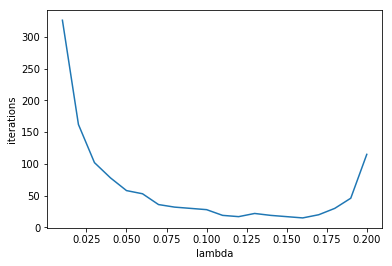

In [49]:
def lamdas_convergence():
    x = []
    y = []
    for l in range(1, 21):
        iters = 0
        w, i = find_min(l=l/100)
        x += [l/100]
        y += [i]
        
    plt.plot(x, y)
    plt.xlabel('lambda')
    plt.ylabel('iterations')
    plt.show() 
    
lamdas_convergence()